In [1]:
%matplotlib inline
import os, sys, gc
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from numpy import array
from soft_knn import SoftKNN, softmax

load_dir = 'lo-shot-dinos-classification-genetic-pilot'
print(os.listdir(load_dir))

['participants.csv', 'survey-multi-choice.csv', 'html-button-response.csv']


In [2]:
sl =[[array([0., 0., 1.]), array([0.25, 0.25, 0.5 ])],#0
 [array([0., 0., 1.]), array([0.25, 0.5 , 0.25])],#1
 [array([0., 0., 1.]), array([0.25, 0.75, 0.  ])],#2
 [array([0., 0., 1.]), array([0.5, 0.5, 0. ])],#3
 [array([0.  , 0.25, 0.75]), array([0.25, 0.  , 0.75])],#4
 [array([0.  , 0.25, 0.75]), array([0.25, 0.25, 0.5 ])],#5
 [array([0.  , 0.25, 0.75]), array([0.25, 0.5 , 0.25])],#6
 [array([0.  , 0.25, 0.75]), array([0.25, 0.75, 0.  ])],#7
 [array([0.  , 0.25, 0.75]), array([0.5, 0. , 0.5])],#8
 [array([0.  , 0.25, 0.75]), array([0.5 , 0.25, 0.25])],#9
 [array([0.  , 0.25, 0.75]), array([0.5, 0.5, 0. ])],#10
 [array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])],#11
 [array([0. , 0.5, 0.5]), array([0.25, 0.25, 0.5 ])],#12
 [array([0. , 0.5, 0.5]), array([0.5, 0. , 0.5])],#13
 [array([0. , 0.5, 0.5]), array([0.5 , 0.25, 0.25])],#14
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.25, 0.5 ])],#15
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.5 , 0.25])]]#16

peaks_dict={}
peaks_dict[1]=[26.80555556, 13.78021978,  4.6043956 ]
peaks_dict[2]=[26.74,       13.88505747,  4.31818182]
peaks_dict[4]=[ 41.,  -22.,    9.5]
peaks_dict[5]=[29.16666667, 29.875,       8.55194805]
peaks_dict[6]=[27.40909091, 13.43434343,  4.64444444]
peaks_dict[7]=[26.90909091, 14.30434783,  4.56701031]
peaks_dict[8]=[15.33333333, -2.66666667,  5.34579439]
peaks_dict[9]= [12.96842105,  8.56521739,  5.58536585]
peaks_dict[10]= [20.,   21.,    0.99]
peaks_dict[11]= [10.73863636,  9.56666667,  7.81707317]
peaks_dict[12]= [21.23529412,  5.98913043, 21.14864865]
peaks_dict[13]= [12.12162162,  5.72988506,  9.50769231]
peaks_dict[14]= [13.4875,      6.87179487,  6.78571429]
peaks_dict[16]= [38.,         13.74038462,  4.48387097]


## Probabilties

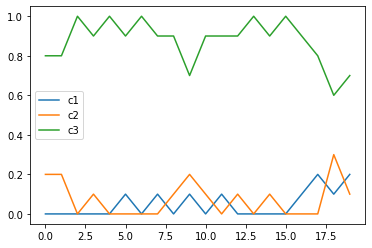

[13.8         9.33333333  9.26857143]
[ 41.  -22.    9.5]


/tmp/ipykernel_132072/3064832552.py:38: RuntimeWarning: divide by zero encountered in true_divide
  shift=(1-lab2)/diffs


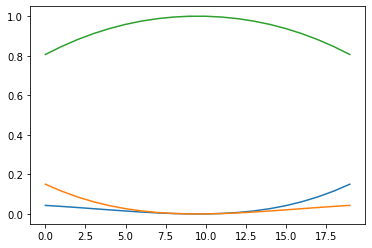

[ 41.  -22.    9.5]


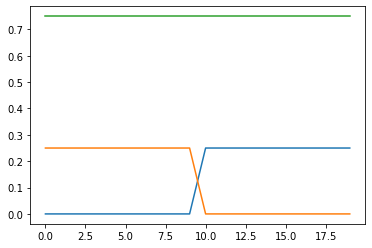

[ 41.  -22.    9.5]


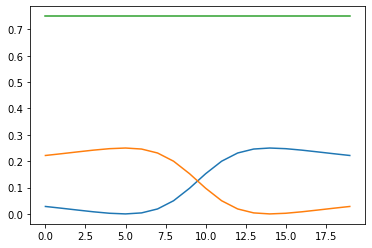

[ 41.  -22.    9.5]


In [3]:
i=0
for num in [4]:
    i+=1
    ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
    button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
    responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
    responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
    for wid in ignore:
        responses = responses[responses.wid != wid]
    responses = responses[responses.label_pair == num]

    responses["response"] = responses["response"].astype('category',copy=False)
    responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

    cloud=responses
    cloud_dict={}
    for i in range(20):
        cloud_dict[i]=[0, 0, 0]
    for i in range(len(cloud.target_dino)):
        cloud_dict[int(list(cloud.target_dino)[i])][list(cloud.response)[i]]+=1
    class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
    class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
    class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
    plt.plot(list(range(20)),class1, label='c1')
    plt.plot(list(range(20)),class2, label='c2')
    plt.plot(list(range(20)),class3, label='c3')
    plt.legend()
    plt.show()
    mp1=np.sum(class1*np.array(range(20)))/np.sum(class1)
    mp2=np.sum(class2*np.array(range(20)))/np.sum(class2)
    mp3=np.sum(class3*np.array(range(20)))/np.sum(class3)
    mean_peaks=np.array([mp1,mp2,mp3])

    def peaks(lab1, lab2):
        diffs = lab2-lab1
        shift=(1-lab2)/diffs
        shift[diffs==0]=-0.5
        return 14+(shift*(14-5))
    shift_peaks=peaks(*sl[num])
    print(mean_peaks)
    print(shift_peaks)

    clf=SoftKNN(k=3)
    prototype_loc = shift_peaks#mean_peaks+[20,0,0]#+[-3,-11,-1.01]#+[41/2 - mean_peaks[0]/2,0,0]#mean_peaks+[41/2 - mean_peaks[0]/2,-41/2 + mean_peaks[1]/2,0]#np.array([18,13.7,4.6])
    prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
    clf.fit(prototype_loc, prototype_lab)
    x=np.linspace(0,19, 20)
    preds=clf.probabilities(x)
    plt.plot(x,preds)
    plt.show()
    print(prototype_loc)

    clf2=SoftKNN(k=1)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    plt.plot(x,preds)
    plt.show()
    print(prototype_loc)

    clf2=SoftKNN(k=2)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    plt.plot(x,preds)
    plt.show()
    print(prototype_loc)

[[2.58555343e-02 9.78342351e-02 8.76310231e-01]
 [1.77509322e-02 7.23720620e-02 9.09877006e-01]
 [1.04004184e-02 4.61149711e-02 9.43484611e-01]
 [4.42411237e-03 2.15738454e-02 9.74002042e-01]
 [6.99201119e-04 3.80177315e-03 9.95499026e-01]
 [3.28370796e-04 2.02529394e-03 9.97646335e-01]
 [4.34033157e-03 3.10382918e-02 9.64621377e-01]
 [1.28396834e-02 1.09557176e-01 8.77603141e-01]
 [2.36649726e-02 2.50489565e-01 7.25845463e-01]
 [3.19661172e-02 4.43511837e-01 5.24522045e-01]
 [3.28244919e-02 6.48738481e-01 3.18437027e-01]
 [2.53635550e-02 8.19731076e-01 1.54905369e-01]
 [1.34815807e-02 9.32487434e-01 5.40309854e-02]
 [3.15659209e-03 9.88308039e-01 8.53536912e-03]
 [2.94316729e-04 9.99158967e-01 5.46716716e-04]
 [1.04208316e-02 9.76139896e-01 1.34392721e-02]
 [3.90700081e-02 9.25801219e-01 3.51287725e-02]
 [9.17406562e-02 8.50851553e-01 5.74077911e-02]
 [1.72814241e-01 7.52511929e-01 7.46738299e-02]
 [2.83273116e-01 6.33444492e-01 8.32823923e-02]]
[[4.32915814e-02 1.50357744e-01 8.06350

/tmp/ipykernel_132072/2702726598.py:51: RuntimeWarning: divide by zero encountered in true_divide
  shift=(1-lab2)/diffs
/tmp/ipykernel_132072/2702726598.py:51: RuntimeWarning: divide by zero encountered in true_divide
  shift=(1-lab2)/diffs


[[1.13597625e-01 4.37614590e-01 4.48787784e-01]
 [9.82200346e-02 4.44231484e-01 4.57548481e-01]
 [8.11571779e-02 4.51232111e-01 4.67610711e-01]
 [6.24551859e-02 4.58234489e-01 4.79310325e-01]
 [4.25286052e-02 4.64170875e-01 4.93300520e-01]
 [2.26490543e-02 4.65685958e-01 5.11664988e-01]
 [6.03951037e-03 4.45499051e-01 5.48461438e-01]
 [2.87505974e-04 7.36191516e-01 2.63520978e-01]
 [2.21827140e-02 5.24792484e-01 4.53024802e-01]
 [1.04676005e-01 4.65402907e-01 4.29921088e-01]
 [2.92386534e-01 3.63408727e-01 3.44204739e-01]
 [5.84289223e-01 2.12144373e-01 2.03566404e-01]
 [8.57987980e-01 7.21878945e-02 6.98241254e-02]
 [9.87671521e-01 6.25021826e-03 6.07826091e-03]
 [9.89887435e-01 5.11697356e-03 4.99559101e-03]
 [9.35865206e-01 3.24052038e-02 3.17295899e-02]
 [8.69480854e-01 6.58720807e-02 6.46470654e-02]
 [8.07410675e-01 9.71096023e-02 9.54797228e-02]
 [7.53950104e-01 1.23972909e-01 1.22076987e-01]
 [7.09082322e-01 1.46487577e-01 1.44430101e-01]]


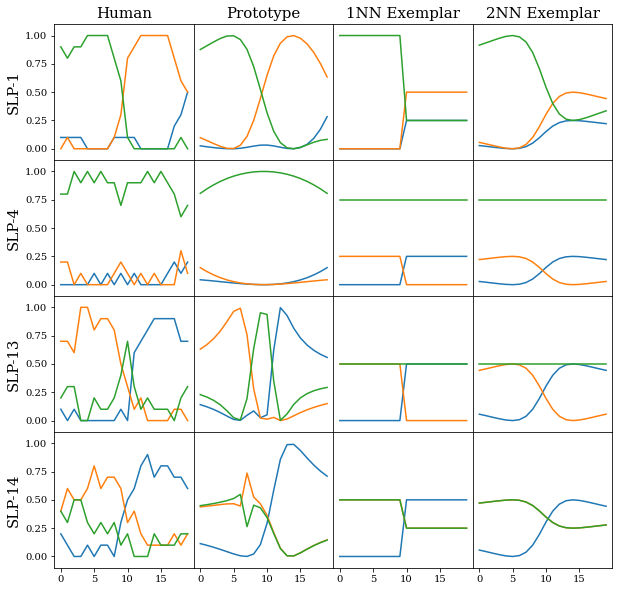

In [4]:
counter=0
fig = plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Serif"

for num in [1,4,13,14]:
    counter+=1
    ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
    button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
    responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
    responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
    for wid in ignore:
        responses = responses[responses.wid != wid]
    responses = responses[responses.label_pair == num]

    responses["response"] = responses["response"].astype('category',copy=False)
    responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

    cloud=responses
    cloud_dict={}
    for i in range(20):
        cloud_dict[i]=[0, 0, 0]
    for i in range(len(cloud.target_dino)):
        cloud_dict[int(list(cloud.target_dino)[i])][list(cloud.response)[i]]+=1
    class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
    class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
    class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
    
    plt.subplot(4,4,(counter-1)*4 + 1)
    plt.ylabel("SLP-{0}".format(num), fontsize=15)
    plt.ylim(-0.1,1.1)
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Human", fontsize=15)
    plt.plot(list(range(20)),class1, label='c1')
    plt.plot(list(range(20)),class2, label='c2')
    plt.plot(list(range(20)),class3, label='c3')
    #plt.legend()
    #plt.show()
    mp1=np.sum(class1*np.array(range(20)))/np.sum(class1)
    mp2=np.sum(class2*np.array(range(20)))/np.sum(class2)
    mp3=np.sum(class3*np.array(range(20)))/np.sum(class3)
    mean_peaks=np.array([mp1,mp2,mp3])

    def peaks(lab1, lab2):
        diffs = lab2-lab1
        shift=(1-lab2)/diffs
        shift[diffs==0]=-0.5
        return 14+(shift*(14-5))
    shift_peaks=peaks(*sl[num])
    #print(mean_peaks)
    #print(shift_peaks)
    from soft_knn import SoftKNN, softmax
    
    plt.subplot(4,4,(counter-1)*4 + 2)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Prototype", fontsize=15)
    clf=SoftKNN(k=3)
    prototype_loc = peaks_dict[num]#mean_peaks+[20,0,0]#+[-3,-11,-1.01]#+[41/2 - mean_peaks[0]/2,0,0]#mean_peaks+[41/2 - mean_peaks[0]/2,-41/2 + mean_peaks[1]/2,0]#np.array([18,13.7,4.6])
    prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
    clf.fit(prototype_loc, prototype_lab)
    x=np.linspace(0,19, 20)
    preds=clf.probabilities(x)
    print(preds)
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(4,4,(counter-1)*4 + 3)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("1NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=1)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(4,4,(counter-1)*4 + 4)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("2NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=2)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    plt.plot(x,preds)
    #plt.show()
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figs/PvE/pve.png")
#     print(prototype_loc)

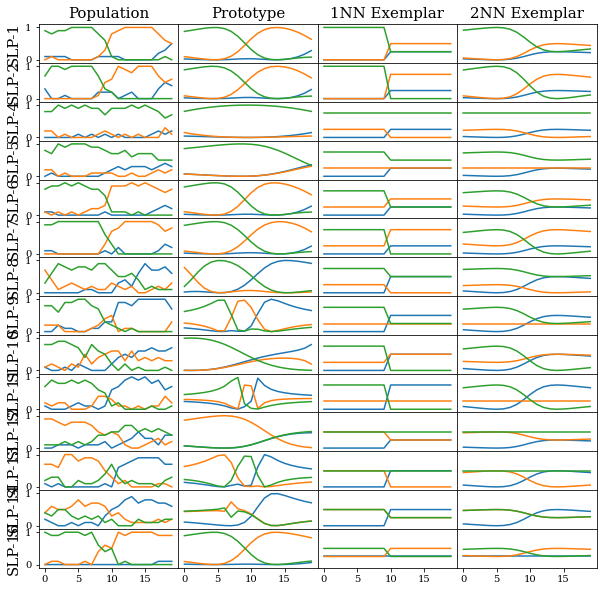

In [5]:
def peaks(lab1, lab2):
    diffs = lab2-lab1
    shift=(1-lab2)/diffs
    shift[diffs==0]=-0.5
    return 14+(shift*(14-5))
shift_peaks=peaks(*sl[num])
#print(mean_peaks)
#print(shift_peaks)
from soft_knn import SoftKNN, softmax
from sklearn.metrics import r2_score as r2
counter=0
fig = plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Serif"

mses1=[]
mses2=[]
mses3=[]
r2s1=[]
r2s2=[]
r2s3=[]
varis=[]
ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
for wid in ignore:
    responses = responses[responses.wid != wid]
num_set=list(set(responses.label_pair))
l=len(num_set)
for num in num_set:
    counter+=1
    ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
    button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
    responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
    responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
    for wid in ignore:
        responses = responses[responses.wid != wid]
    responses = responses[responses.label_pair == num]

    responses["response"] = responses["response"].astype('category',copy=False)
    responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

    cloud=responses
    cloud_dict={}
    for i in range(20):
        cloud_dict[i]=[0, 0, 0]
    for i in range(len(cloud.target_dino)):
        cloud_dict[int(list(cloud.target_dino)[i])][list(cloud.response)[i]]+=1
    class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
    class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
    class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
    varis.append(np.var(np.vstack([class1,class2,class3]).transpose()))
    plt.subplot(l,4,(counter-1)*4 + 1)
    plt.ylabel("SLP-{0}".format(num), fontsize=15)
    plt.ylim(-0.1,1.1)
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Population", fontsize=15)
    plt.plot(list(range(20)),class1, label='c1')
    plt.plot(list(range(20)),class2, label='c2')
    plt.plot(list(range(20)),class3, label='c3')
    #plt.legend()
    #plt.show()
    mp1=np.sum(class1*np.array(range(20)))/np.sum(class1)
    mp2=np.sum(class2*np.array(range(20)))/np.sum(class2)
    mp3=np.sum(class3*np.array(range(20)))/np.sum(class3)
    mean_peaks=np.array([mp1,mp2,mp3])

    
    
    plt.subplot(l,4,(counter-1)*4 + 2)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Prototype", fontsize=15)
    clf=SoftKNN(k=3)
    prototype_loc = peaks_dict[num]#mean_peaks+[20,0,0]#+[-3,-11,-1.01]#+[41/2 - mean_peaks[0]/2,0,0]#mean_peaks+[41/2 - mean_peaks[0]/2,-41/2 + mean_peaks[1]/2,0]#np.array([18,13.7,4.6])
    prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
    clf.fit(prototype_loc, prototype_lab)
    x=np.linspace(0,19, 20)
    preds=clf.probabilities(x)
    mse1=np.sum((np.vstack([class1, class2, class3]).transpose()-preds)**2)
    mses1.append(mse1)
    r2s1.append(r2(np.vstack([class1, class2, class3]).transpose(),preds,multioutput="variance_weighted"))
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(l,4,(counter-1)*4 + 3)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("1NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=1)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    mse2=np.sum((np.vstack([class1, class2, class3]).transpose()-preds)**2)
    mses2.append(mse2)
    r2s2.append(r2(np.vstack([class1, class2, class3]).transpose(),preds,multioutput="variance_weighted"))
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(l,4,(counter-1)*4 + 4)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("2NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=2)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    mse3=np.sum((np.vstack([class1, class2, class3]).transpose()-preds)**2)
    mses3.append(mse3)
    r2s3.append(r2(np.vstack([class1, class2, class3]).transpose(),preds,multioutput="variance_weighted"))
    plt.plot(x,preds)
    #plt.show()
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figs/PvE/pve.png")
#     print(prototype_loc)

In [229]:
from scipy.stats import pearsonr, spearmanr
mses1=np.array(mses1)
mses2=np.array(mses2)
mess3=np.array(mses3)
varis=np.array(varis)
np.mean(mses1),np.mean(mses2), np.mean(mses3)
np.mean(r2s1), np.mean(r2s2), np.mean(r2s3)

(0.6085577493368524, 0.28429114982360604, 0.2985109770658907)

In [220]:
np.var(np.vstack([class1,class2,class3]).transpose())


0.1768888888888889

## Classifications

In [14]:
def hardmax(x):
    preds=x.max(axis=1,keepdims=1) == x
    normed=[p/sum(p) for p in preds]
    return normed


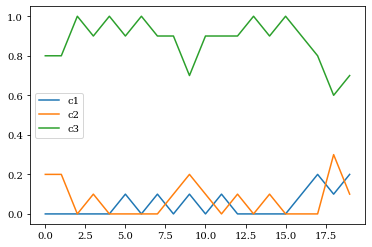

[13.8         9.33333333  9.26857143]
[ 41.  -22.    9.5]


/tmp/ipykernel_132072/576309208.py:38: RuntimeWarning: divide by zero encountered in true_divide
  shift=(1-lab2)/diffs


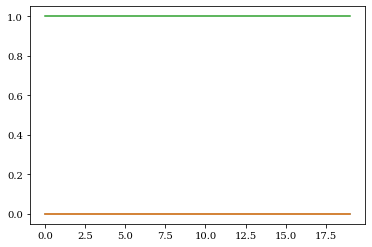

[ 41.  -22.    9.5]


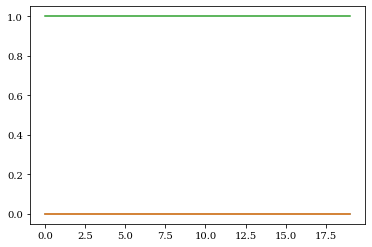

[ 41.  -22.    9.5]


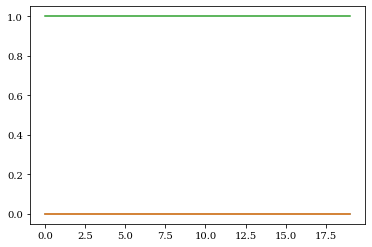

[ 41.  -22.    9.5]


In [15]:
i=0
for num in [4]:
    i+=1
    ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
    button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
    responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
    responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
    for wid in ignore:
        responses = responses[responses.wid != wid]
    responses = responses[responses.label_pair == num]

    responses["response"] = responses["response"].astype('category',copy=False)
    responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

    cloud=responses
    cloud_dict={}
    for i in range(20):
        cloud_dict[i]=[0, 0, 0]
    for i in range(len(cloud.target_dino)):
        cloud_dict[int(list(cloud.target_dino)[i])][list(cloud.response)[i]]+=1
    class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
    class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
    class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
    plt.plot(list(range(20)),class1, label='c1')
    plt.plot(list(range(20)),class2, label='c2')
    plt.plot(list(range(20)),class3, label='c3')
    plt.legend()
    plt.show()
    mp1=np.sum(class1*np.array(range(20)))/np.sum(class1)
    mp2=np.sum(class2*np.array(range(20)))/np.sum(class2)
    mp3=np.sum(class3*np.array(range(20)))/np.sum(class3)
    mean_peaks=np.array([mp1,mp2,mp3])

    def peaks(lab1, lab2):
        diffs = lab2-lab1
        shift=(1-lab2)/diffs
        shift[diffs==0]=-0.5
        return 14+(shift*(14-5))
    shift_peaks=peaks(*sl[num])
    print(mean_peaks)
    print(shift_peaks)

    clf=SoftKNN(k=3)
    prototype_loc = shift_peaks#mean_peaks+[20,0,0]#+[-3,-11,-1.01]#+[41/2 - mean_peaks[0]/2,0,0]#mean_peaks+[41/2 - mean_peaks[0]/2,-41/2 + mean_peaks[1]/2,0]#np.array([18,13.7,4.6])
    prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
    clf.fit(prototype_loc, prototype_lab)
    x=np.linspace(0,19, 20)
    preds=clf.probabilities(x)
    preds=hardmax(preds)
    plt.plot(x,preds)
    plt.show()
    print(prototype_loc)

    clf2=SoftKNN(k=1)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    preds=hardmax(preds)
    plt.plot(x,preds)
    plt.show()
    print(prototype_loc)

    clf2=SoftKNN(k=2)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    preds=hardmax(preds)
    plt.plot(x,preds)
    plt.show()
    print(prototype_loc)

/tmp/ipykernel_132072/547007254.py:51: RuntimeWarning: divide by zero encountered in true_divide
  shift=(1-lab2)/diffs
/tmp/ipykernel_132072/547007254.py:51: RuntimeWarning: divide by zero encountered in true_divide
  shift=(1-lab2)/diffs


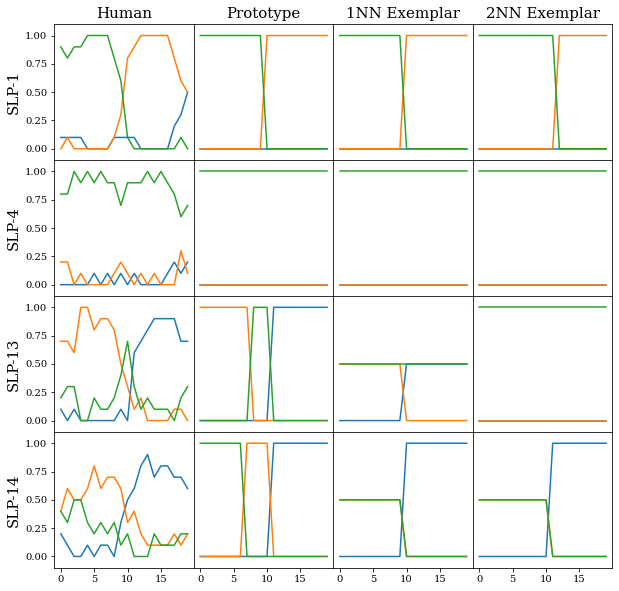

In [16]:
counter=0
fig = plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Serif"

for num in [1,4,13,14]:
    counter+=1
    ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
    button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
    responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
    responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
    for wid in ignore:
        responses = responses[responses.wid != wid]
    responses = responses[responses.label_pair == num]

    responses["response"] = responses["response"].astype('category',copy=False)
    responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

    cloud=responses
    cloud_dict={}
    for i in range(20):
        cloud_dict[i]=[0, 0, 0]
    for i in range(len(cloud.target_dino)):
        cloud_dict[int(list(cloud.target_dino)[i])][list(cloud.response)[i]]+=1
    class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
    class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
    class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
    
    plt.subplot(4,4,(counter-1)*4 + 1)
    plt.ylabel("SLP-{0}".format(num), fontsize=15)
    plt.ylim(-0.1,1.1)
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Human", fontsize=15)
    plt.plot(list(range(20)),class1, label='c1')
    plt.plot(list(range(20)),class2, label='c2')
    plt.plot(list(range(20)),class3, label='c3')
    #plt.legend()
    #plt.show()
    mp1=np.sum(class1*np.array(range(20)))/np.sum(class1)
    mp2=np.sum(class2*np.array(range(20)))/np.sum(class2)
    mp3=np.sum(class3*np.array(range(20)))/np.sum(class3)
    mean_peaks=np.array([mp1,mp2,mp3])

    def peaks(lab1, lab2):
        diffs = lab2-lab1
        shift=(1-lab2)/diffs
        shift[diffs==0]=-0.5
        return 14+(shift*(14-5))
    shift_peaks=peaks(*sl[num])
    #print(mean_peaks)
    #print(shift_peaks)
    from soft_knn import SoftKNN, softmax
    
    plt.subplot(4,4,(counter-1)*4 + 2)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Prototype", fontsize=15)
    clf=SoftKNN(k=3)
    prototype_loc = peaks_dict[num]#mean_peaks+[20,0,0]#+[-3,-11,-1.01]#+[41/2 - mean_peaks[0]/2,0,0]#mean_peaks+[41/2 - mean_peaks[0]/2,-41/2 + mean_peaks[1]/2,0]#np.array([18,13.7,4.6])
    prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
    clf.fit(prototype_loc, prototype_lab)
    x=np.linspace(0,19, 20)
    preds=clf.probabilities(x)
    preds=hardmax(preds)
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(4,4,(counter-1)*4 + 3)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("1NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=1)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    preds=hardmax(preds)
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(4,4,(counter-1)*4 + 4)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<4:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("2NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=2)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    preds=hardmax(preds)
    plt.plot(x,preds)
    #plt.show()
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figs/PvE/pve.png")
#     print(prototype_loc)

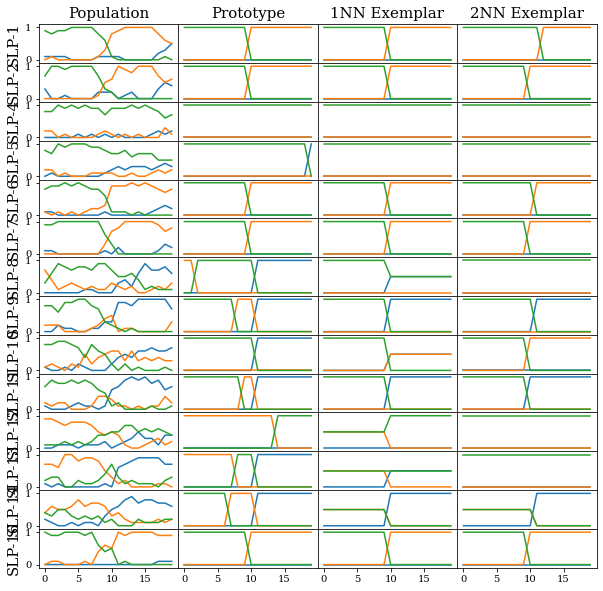

In [17]:
def peaks(lab1, lab2):
    diffs = lab2-lab1
    shift=(1-lab2)/diffs
    shift[diffs==0]=-0.5
    return 14+(shift*(14-5))
shift_peaks=peaks(*sl[num])
#print(mean_peaks)
#print(shift_peaks)
from soft_knn import SoftKNN, softmax
from sklearn.metrics import r2_score as r2
counter=0
fig = plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Serif"

mses1=[]
mses2=[]
mses3=[]
r2s1=[]
r2s2=[]
r2s3=[]
varis=[]
ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
for wid in ignore:
    responses = responses[responses.wid != wid]
num_set=list(set(responses.label_pair))
l=len(num_set)
for num in num_set:
    counter+=1
    ignore = ['w93e05c8', 'w8f3a5e6', 'w72ff099', 'w6189e36', 'w3cbe79c',
           'w86d39ac', 'wfc8e96c', 'wf2fae6e', 'w2c152d2', 'wbfb9c6f',]
           #'wcfe7234', 'wb38724c', 'we815cde', 'wb2873cd', 'wf369503']
    button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
    responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
    responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
    for wid in ignore:
        responses = responses[responses.wid != wid]
    responses = responses[responses.label_pair == num]

    responses["response"] = responses["response"].astype('category',copy=False)
    responses["target_dino"] = responses["target_dino"].astype('category',copy=False)

    cloud=responses
    cloud_dict={}
    for i in range(20):
        cloud_dict[i]=[0, 0, 0]
    for i in range(len(cloud.target_dino)):
        cloud_dict[int(list(cloud.target_dino)[i])][list(cloud.response)[i]]+=1
    class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
    class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
    class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
    varis.append(np.var(np.vstack([class1,class2,class3]).transpose()))
    plt.subplot(l,4,(counter-1)*4 + 1)
    plt.ylabel("SLP-{0}".format(num), fontsize=15)
    plt.ylim(-0.1,1.1)
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Population", fontsize=15)
    plt.plot(list(range(20)),class1, label='c1')
    plt.plot(list(range(20)),class2, label='c2')
    plt.plot(list(range(20)),class3, label='c3')
    #plt.legend()
    #plt.show()
    mp1=np.sum(class1*np.array(range(20)))/np.sum(class1)
    mp2=np.sum(class2*np.array(range(20)))/np.sum(class2)
    mp3=np.sum(class3*np.array(range(20)))/np.sum(class3)
    mean_peaks=np.array([mp1,mp2,mp3])

    
    
    plt.subplot(l,4,(counter-1)*4 + 2)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("Prototype", fontsize=15)
    clf=SoftKNN(k=3)
    prototype_loc = peaks_dict[num]#mean_peaks+[20,0,0]#+[-3,-11,-1.01]#+[41/2 - mean_peaks[0]/2,0,0]#mean_peaks+[41/2 - mean_peaks[0]/2,-41/2 + mean_peaks[1]/2,0]#np.array([18,13.7,4.6])
    prototype_lab = np.array([np.array([1., 0., 0.]), np.array([0.,1.,0.]), np.array([0.,0.,1.])])
    clf.fit(prototype_loc, prototype_lab)
    x=np.linspace(0,19, 20)
    preds=clf.probabilities(x)
    preds=hardmax(preds)
    mse1=np.sum((np.vstack([class1, class2, class3]).transpose()-preds)**2)
    mses1.append(mse1)
    r2s1.append(r2(np.vstack([class1, class2, class3]).transpose(),preds,multioutput="variance_weighted"))
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(l,4,(counter-1)*4 + 3)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("1NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=1)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    preds=hardmax(preds)
    mse2=np.sum((np.vstack([class1, class2, class3]).transpose()-preds)**2)
    mses2.append(mse2)
    r2s2.append(r2(np.vstack([class1, class2, class3]).transpose(),preds,multioutput="variance_weighted"))
    plt.plot(x,preds)
    #plt.show()
    #print(prototype_loc)
    
    plt.subplot(l,4,(counter-1)*4 + 4)
    plt.ylim(-0.1,1.1)
    plt.yticks([])
    if counter<l:
        plt.xticks([])
    else:
        plt.xticks([0,5,10,15])
    if counter==1:
        plt.title("2NN Exemplar", fontsize=15)
    clf2=SoftKNN(k=2)
    clf2.fit([5.0001,14.0001],sl[num])
    x=np.linspace(0,19, 20)
    preds=clf2.probabilities(x)
    preds=hardmax(preds)
    mse3=np.sum((np.vstack([class1, class2, class3]).transpose()-preds)**2)
    mses3.append(mse3)
    r2s3.append(r2(np.vstack([class1, class2, class3]).transpose(),preds,multioutput="variance_weighted"))
    plt.plot(x,preds)
    #plt.show()
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figs/PvE/pve.png")
#     print(prototype_loc)